In [92]:
import os
import numpy as np
import matplotlib.pyplot as plt
import globals as gl
import PcmPy as pcm
import pandas as pd
import seaborn as sb
from vis import lineplot_roi_avg

experiment = 'EFC_learningfMRI'

plt.style.use('default')

In [82]:
rois = gl.rois['ROI']
sessions = [3, 9, 23]
H = 'L'

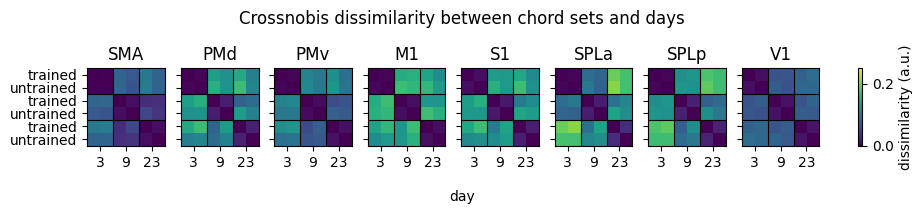

In [83]:
fig, axs = plt.subplots(1, len(rois), sharex=True, sharey=True, figsize=(10, 2))

vmin, vmax = 0, .25

for r, roi in enumerate(rois):
    ax = axs[r]
    G = np.load(os.path.join(gl.baseDir, gl.pcmDir, f'G_obs.trained-untrained.{H}.{roi}.npy'))
    D = pcm.G_to_dist(G)
    ax.imshow(D.mean(axis=0), vmin=vmin, vmax=vmax)
    ax.set_title(roi)
    ax.set_xticks([.5, 2.5, 4.5])
    ax.set_xticklabels(sessions)
    ax.set_yticks(np.arange(6))
    ax.set_yticklabels(['trained', 'untrained'] * 3)
    ax.axhline(1.5, color='k', lw=.8)
    ax.axhline(3.5, color='k', lw=.8)
    ax.axvline(1.5, color='k', lw=.8)
    ax.axvline(3.5, color='k', lw=.8)

fig.supxlabel('day', fontsize=10)

cax = ax.get_images()[0]
cbar = fig.colorbar(cax, ax=axs, orientation='vertical', fraction=.005)
cbar.set_label('dissimilarity (a.u.)')

fig.suptitle('Crossnobis dissimilarity between chord sets and days')

plt.show()

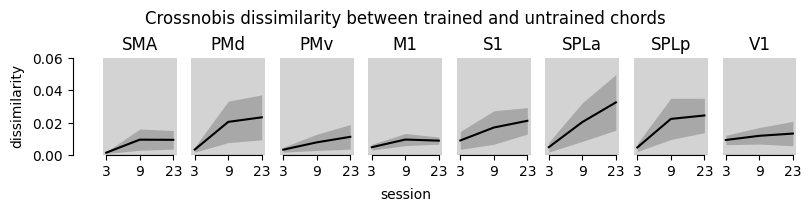

In [84]:
xnob = {'within': [], 'session': [], 'sn': [], 'roi': [], 'Hem': []}
for r, roi in enumerate(rois):
    G = np.load(os.path.join(gl.baseDir, gl.pcmDir, f'G_obs.trained-untrained.{H}.{roi}.npy'))
    D = pcm.G_to_dist(G)
    for I, i in enumerate(np.arange(1, 6, 2)):
        within = D[:, i-1, i]
        xnob['within'].extend(within)
        xnob['session'].extend(np.repeat(sessions[I], within.size))
        xnob['sn'].extend(np.arange(within.size))
        xnob['roi'].extend([roi] * within.size)
        xnob['Hem'].extend([H] * within.size)

df_xnob = pd.DataFrame(xnob)
fig, axs = plt.subplots(1, len(rois), sharex=True, sharey=True, figsize=(8, 2), constrained_layout=True)
fig, axs = lineplot_roi_avg(fig, axs, df_xnob, metric='within', H='L', rois=rois, color='k')
axs[0].set_ylim([0, .06])
fig.supxlabel('session', fontsize=10)
fig.supylabel('dissimilarity', fontsize=10)
fig.suptitle('Crossnobis dissimilarity between trained and untrained chords')

plt.show()

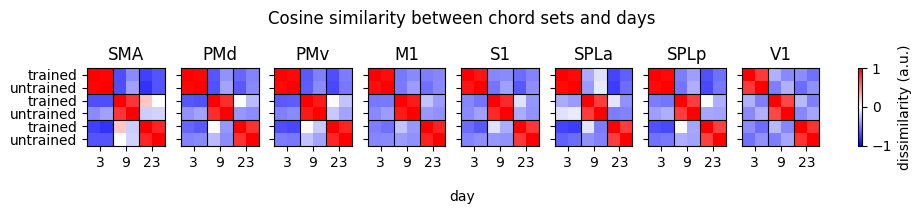

In [85]:
fig, axs = plt.subplots(1, len(rois), sharex=True, sharey=True, figsize=(10, 2))

vmin, vmax = -1, 1

for r, roi in enumerate(rois):
    ax = axs[r]
    G = np.load(os.path.join(gl.baseDir, gl.pcmDir, f'G_obs.trained-untrained.{H}.{roi}.npy'))
    D = pcm.G_to_cosine(G)
    ax.imshow(D.mean(axis=0), vmin=vmin, vmax=vmax, cmap='bwr')
    ax.set_title(roi)
    ax.set_xticks([.5, 2.5, 4.5])
    ax.set_xticklabels([3, 9, 23])
    ax.set_yticks(np.arange(6))
    ax.set_yticklabels(['trained', 'untrained'] * 3)
    ax.axhline(1.5, color='k', lw=.8)
    ax.axhline(3.5, color='k', lw=.8)
    ax.axvline(1.5, color='k', lw=.8)
    ax.axvline(3.5, color='k', lw=.8)

fig.supxlabel('day', fontsize=10)

cax = ax.get_images()[0]
cbar = fig.colorbar(cax, ax=axs, orientation='vertical', fraction=.005)
cbar.set_label('dissimilarity (a.u.)')

fig.suptitle('Cosine similarity between chord sets and days')

plt.show()

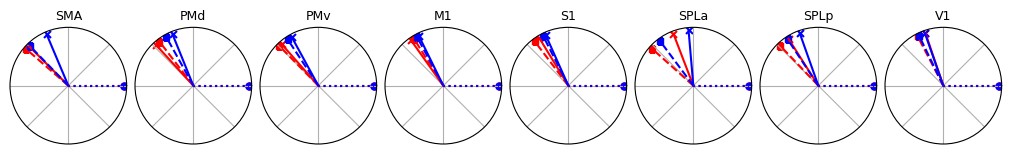

In [86]:
fig, axs = plt.subplots(
    1, len(rois),
    sharex=True, sharey=True,
    figsize=(10, 2),
    subplot_kw={'projection': 'polar'},
    constrained_layout=True
)
axs = np.atleast_1d(axs)  # handles len(rois) == 1

for i, roi in enumerate(rois):
    ax = axs[i]

    G = np.load(os.path.join(gl.baseDir, gl.pcmDir, f'G_obs.trained-untrained.{H}.{roi}.npy'))
    D = pcm.G_to_cosine(G)
    rad = np.arccos(D)

    # Mean angle for the selected pairs (0, 2, 4)
    theta_tr = rad[:, [0, 0, 0], [0, 2, 4]].mean(axis=0)  # shape (3,)
    theta_untr = rad[:, [1, 1, 1], [1, 3, 5]].mean(axis=0)  # shape (3,)

    linestyles = [':', '-', '--', ]
    for th_tr, th_untr, ls in zip(theta_tr, theta_untr, linestyles):
        ax.plot([0.0, th_tr], [0.0, 1.0], color='r', ls=ls)
        ax.plot([0.0, th_untr], [0.0, 1.0], color='b', ls=ls)

    markers = ['o', 'x', 's']
    for th_tr, th_untr, m in zip(theta_tr, theta_untr, markers):
        ax.scatter(th_tr, 1, s=25, color='r', marker=m)
        ax.scatter(th_untr, 1, s=25, color='b', marker=m)

    ax.set_rticks([])
    ax.set_xticklabels([])
    ax.set_title(roi, fontsize=9)

plt.show()

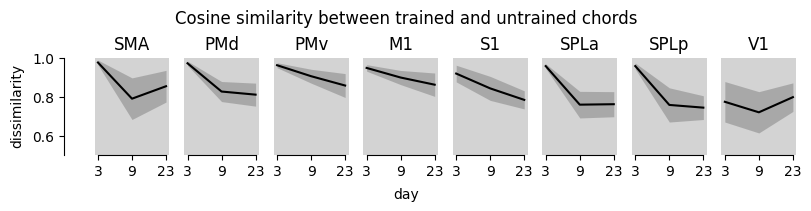

In [87]:
cos = {'within': [], 'between_trained': [], 'between_untrained': [], 'session': [], 'sn': [], 'roi': [], 'Hem': []}
for r, roi in enumerate(rois):
    G = np.load(os.path.join(gl.baseDir, gl.pcmDir, f'G_obs.trained-untrained.{H}.{roi}.npy'))
    D = pcm.G_to_cosine(G)
    for I, i in enumerate(np.arange(1, 6, 2)):
        within = D[:, i-1, i]
        between_trained = D[:, 0, i-1]
        between_untrained = D[:, 0, i]
        cos['within'].extend(within)
        cos['between_trained'].extend(between_trained)
        cos['between_untrained'].extend(between_untrained)
        cos['session'].extend(np.repeat(sessions[I], within.size))
        cos['sn'].extend(np.arange(within.size))
        cos['roi'].extend([roi] * within.size)
        cos['Hem'].extend([H] * within.size)

df_cos = pd.DataFrame(cos)
fig, axs = plt.subplots(1, len(rois), sharex=True, sharey=True, figsize=(8, 2), constrained_layout=True)
fig, axs = lineplot_roi_avg(fig, axs, df_cos.copy(), metric='within', H='L', rois=rois, color='k')
axs[0].set_ylim([.5, 1])
fig.supxlabel('day', fontsize=10)
fig.supylabel('dissimilarity', fontsize=10)
fig.suptitle('Cosine similarity between trained and untrained chords')

plt.show()

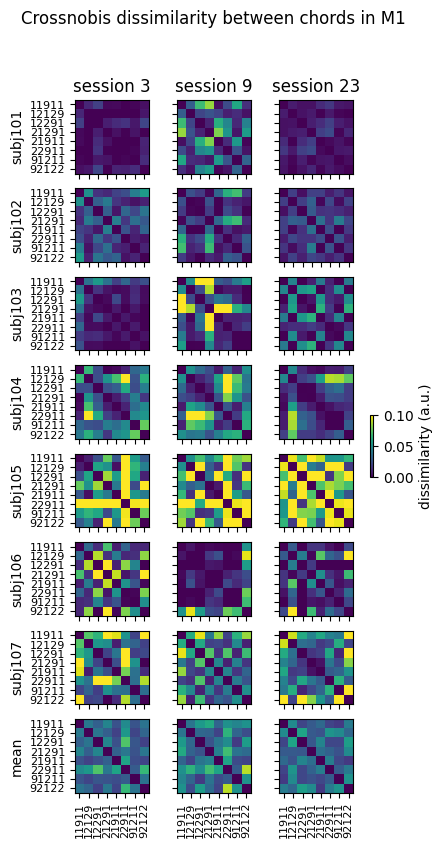

In [88]:
N = 7
roi = 'M1'

fig, axs = plt.subplots(N + 1, len(sessions), sharex=True, sharey=True, figsize=(4, 9))

vmin, vmax = 0, .1
for r, sess in enumerate(sessions):
    G = np.load(os.path.join(gl.baseDir, gl.pcmDir, f'G_obs.chord.{sess}.{H}.{roi}.npy'))
    D = pcm.G_to_dist(G) #/ np.trace(G))
    for i in range(N):
        ax = axs[i, r]
        ax.imshow(D[i], vmin=vmin, vmax=vmax)
        ax.set_yticks(np.arange(8))
        ax.set_yticklabels(gl.chordID, fontsize=8)
        ax.set_ylabel(f'subj{i + 101}') if r==0 else None
    axs[-1, r].imshow(D.mean(axis=0), vmin=vmin, vmax=vmax)
    axs[-1, r].set_xticks(np.arange(8))
    axs[-1, r].set_xticklabels(gl.chordID, rotation=90, fontsize=8)
    axs[-1, r].set_yticks(np.arange(8))
    axs[-1, r].set_yticklabels(gl.chordID, fontsize=8)
    axs[-1, r].set_ylabel(f'mean') if r==0 else None
    axs[0, r].set_title(f'session {sess}')

cax = ax.get_images()[0]
cbar = fig.colorbar(cax, ax=axs, orientation='vertical', fraction=.01)
cbar.set_label('dissimilarity (a.u.)')

fig.suptitle(f'Crossnobis dissimilarity between chords in {roi}')
fig.subplots_adjust(right=.85)

plt.show()

<Axes: xlabel='roi', ylabel='encoding'>

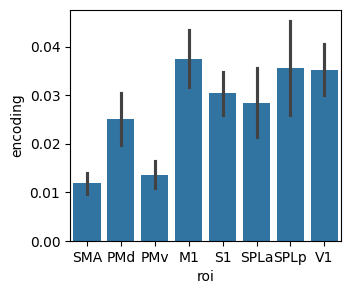

In [113]:
df = pd.read_csv(os.path.join(gl.baseDir, gl.pcmDir, 'representational_stability.BOLD.tsv'), sep='\t')

fig, ax = plt.subplots( figsize=(3.5, 3),)

sb.barplot(data=df[df.Hem==H], ax=ax, x='roi', y='encoding', errorbar='se')


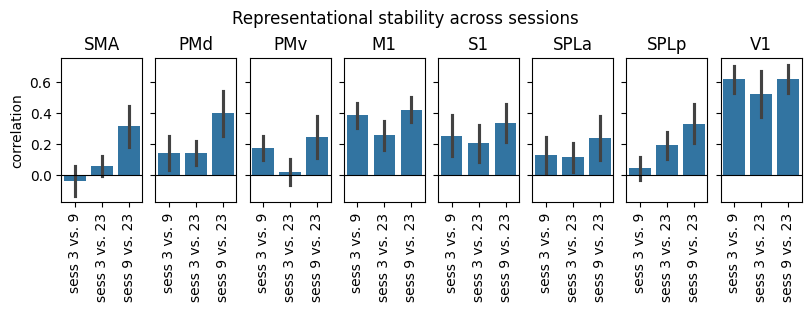

In [115]:
fig, axs = plt.subplots(1, len(rois), figsize=(8, 3), sharex=True, sharey=True, constrained_layout=True)

for r, roi in enumerate(rois):
    ax = axs[r]
    sb.barplot(ax=ax, data=df[(df.roi==roi) & (df.Hem==H)], x='corr_type', y='corr', errorbar='se')
    ax.set_title(roi)
    ax.axhline(0, color='k', lw=.8)
    ax.set_xlabel(None)
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
axs[0].set_ylabel('correlation')

fig.suptitle('Representational stability across sessions')

plt.show()